# Iris 모델

In [1]:
from flask import Blueprint, render_template, request, session, g
from flask import current_app
from werkzeug.utils import secure_filename
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import os
import pandas as pd
import matplotlib.pyplot as plt 

In [12]:
df_csv = pd.read_csv('../static/upload/wine.csv')

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_csv.iloc[:, :-1])

In [14]:
pca = PCA(n_components=2)
pca_array = pca.fit_transform(X_scaled)
df = pd.DataFrame(pca_array, columns=['pca_x', 'pca_y'])
df['target'] = df_csv.iloc[:, -1].values

In [15]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=2021)
kmeans.fit(X_scaled)
df['cluster'] = kmeans.labels_

In [16]:
markers = ['s', 'o', '^', 'P', 'D', 'H', 'x']
plt.figure()
for i in df.target.unique():
    marker = markers[i]
    x_axis_data = df[df.target == i]['pca_x']
    y_axis_data = df[df.target == i]['pca_y']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)
plt.title('Original Data Visualization by 2 PCA Components')
plt.xlabel('PCA 1'); plt.ylabel('PCA 2')
plt.show()

IndexError: list index out of range

In [8]:
df[df.cluster == 0]['pca_x']

0      2.690152
6      2.470961
7      3.693024
10     1.059602
16     3.067407
20     3.413687
22     2.895693
24     2.517970
27     3.021076
28     3.492351
29     1.624602
30     2.551104
33     2.849083
36     1.842204
38     2.834734
39     3.269948
43     2.647508
48     1.935878
49     2.416628
54     3.628296
61     2.348840
62     1.437829
65     3.196556
68     2.984272
69     4.413749
75     2.493447
78     2.703310
85     3.052689
91     3.665690
97     3.013019
99     2.262775
100    2.814391
101    2.240410
105    2.890834
109    2.570152
110    3.033878
114    2.343264
121    3.150553
122    3.294449
Name: pca_x, dtype: float64

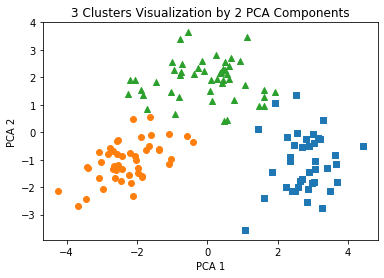

In [7]:
for i in range(3):
    marker = markers[i]
    x_axis_data = df[df.cluster == i]['pca_x']
    y_axis_data = df[df.cluster == i]['pca_y']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)
plt.xlabel('PCA 1'); plt.ylabel('PCA 2')
plt.title(f'{3} Clusters Visualization by 2 PCA Components')
plt.show()

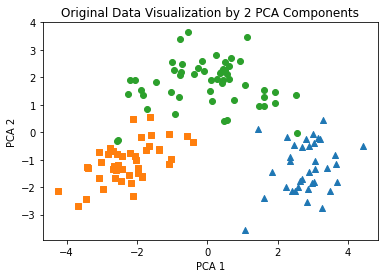

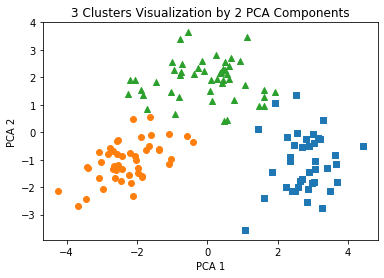

In [11]:
df_csv = pd.read_csv('../static/data/wine_train.csv')
# 전처리 - 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_csv.iloc[:, :-1])

# 차원 축소(PCA)
pca = PCA(n_components=2)
pca_array = pca.fit_transform(X_scaled)
df = pd.DataFrame(pca_array, columns=['pca_x', 'pca_y'])
df['target'] = df_csv.iloc[:, -1].values

# K-Means Clustering
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=2021)
kmeans.fit(X_scaled)
df['cluster'] = kmeans.labels_

# 시각화
markers = ['s', 'o', '^', 'P', 'D', 'H', 'x']
plt.figure()
for i in df.target.unique():
    marker = markers[i]
    x_axis_data = df[df.target == i]['pca_x']
    y_axis_data = df[df.target == i]['pca_y']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)
plt.title('Original Data Visualization by 2 PCA Components')
plt.xlabel('PCA 1'); plt.ylabel('PCA 2')

for i in range(3):
    marker = markers[i]
    x_axis_data = df[df.cluster == i]['pca_x']
    y_axis_data = df[df.cluster == i]['pca_y']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)
plt.xlabel('PCA 1'); plt.ylabel('PCA 2')
plt.title(f'{3} Clusters Visualization by 2 PCA Components')
plt.show()